# Homework 3: Basic Vis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
sns.set(color_codes=True)

# Question 1

We will be using the same dataset (nutritions) as the last homework. Follow the same procedure to clean the dataset as described in Problem 2(a),(b) of Homework 2.

In [2]:
df_data = pd.read_csv('nutritions.csv')
df_nutrition = df_data.dropna()

In [3]:
df_n = df_nutrition[['Ash','Protein','Fat','Carbohydrate','Water']].sum(axis=1)

In [4]:
df_proximities = df_nutrition[(df_n >= 99) & (df_n <= 101)]

In [5]:
df_proximities

,FoodID,GroupID,Food,Group,Protein,Fat,Carbohydrate,Ash,Energy,Water,Sugars,Fiber,Calcium,Iron,Sodium
0,8001,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S ALL-B...",Breakfast Cereals,13.14,4.90,74.24,5.60,260,2.12,15.69,29.3,389,17.60,258
1,8002,800,"Cereals ready-to-eat, POST, ALPHA-BITS",Breakfast Cereals,8.10,3.80,83.70,3.20,385,1.20,35.50,5.7,29,6.40,634
2,8003,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S APPLE...",Breakfast Cereals,5.00,1.90,88.20,2.40,366,2.50,44.00,9.3,11,16.10,459
3,8005,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S ALL-B...",Breakfast Cereals,7.00,2.15,80.00,7.90,250,3.00,27.00,43.0,63,15.00,676
4,8010,800,"Cereals ready-to-eat, QUAKER, CAP'N CRUNCH",Breakfast Cereals,4.39,5.12,85.51,2.48,398,2.50,44.32,2.5,11,19.42,754
5,8011,800,"Cereals ready-to-eat, QUAKER, CAP'N CRUNCH wit...",Breakfast Cereals,4.45,4.83,85.90,2.32,397,2.50,44.20,2.6,11,19.88,725
6,8012,800,"Cereals ready-to-eat, QUAKER, CAP'N CRUNCH'S P...",Breakfast Cereals,7.10,9.23,78.65,2.52,417,2.50,33.36,2.7,9,18.36,742
7,8013,800,"Cereals ready-to-eat, GENERAL MILLS, CHEERIOS",Breakfast Cereals,12.09,6.73,73.23,2.81,371,5.13,4.36,9.4,401,33.17,576
8,8014,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S COCOA...",Breakfast Cereals,5.22,2.90,86.05,3.02,389,2.81,38.50,1.9,130,14.70,424
9,8015,800,"Cereals ready-to-eat, POST, COCOA PEBBLES",Breakfast Cereals,4.70,4.20,85.80,2.80,397,2.50,34.50,1.5,21,6.00,586


# Question 2

(a) Create a scatter plot to display the values of Energy and Fat for Fast Foods and Sweets. 
Use different colors (or markers) for the two food groups.


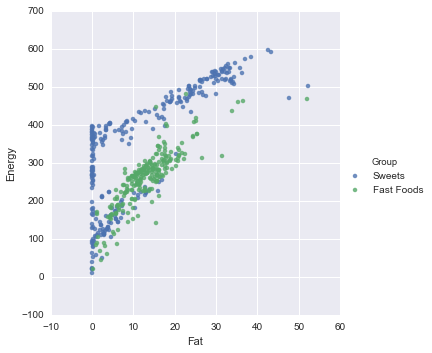

In [6]:
few_groups = ['Fast Foods','Sweets']
df_few_groups = df_proximities[df_proximities['Group'].isin(few_groups)]

grid = sns.lmplot('Fat', 'Energy',
                  data=df_few_groups, hue='Group', fit_reg=False)

(b) Create a bar plot to compare the mean Fat value of food items that contain "egg", "apple", and "chocolate" respectively.
Use df[df.Food.str.lower().str.contains('egg')] to get food items that contain "egg". Do the same for "apple" and "chocolate".
Separate Sweets and Fast Foods in the comparison. Ignore other food groups.
The bar plot should contain confidence intervals for the mean values.


In [7]:
df_foods = df_proximities[df_proximities.Group.isin(('Fast Foods', 'Sweets'))]

#Create separate df for each with new column Ingredient where each value is equal to the specific ingredient 
egg = df_foods[df_foods.Food.str.lower().str.contains('egg')]
df_egg = egg.copy()
df_egg['Ingredient'] = 'Egg' 
apple = df_foods[df_foods.Food.str.lower().str.contains('apple')]
df_apple = apple.copy()
df_apple['Ingredient'] = 'Apple'
choc = df_foods[df_foods.Food.str.lower().str.contains('chocolate')]
df_choc = choc.copy()
df_choc['Ingredient'] = 'Chocolate'

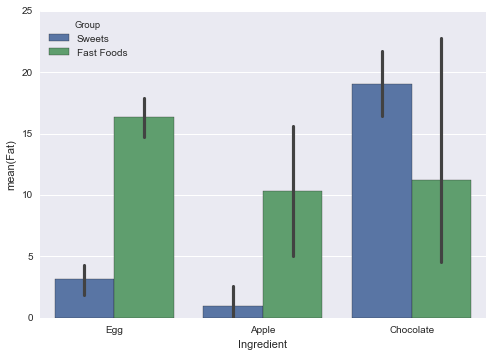

In [8]:
df_grouped = pd.concat([df_egg,df_apple,df_choc],axis=0)
sns.barplot(x='Ingredient', y='Fat', 
            data=df_grouped,
            hue='Group');

(c) Create a box plot for the same groups of data as above.
Explain the similarity and difference between this plot and the previous plot.


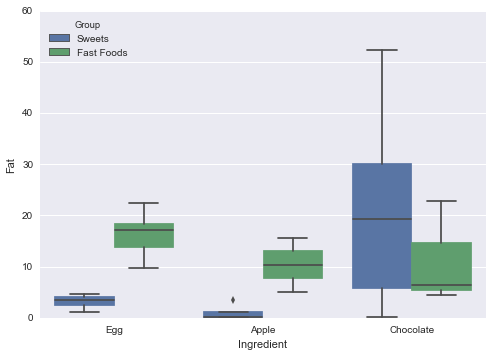

In [9]:
sns.boxplot(x='Ingredient', y='Fat', 
            data=df_grouped,
            hue='Group');

Both graphs include approximations and the confidence interval. The boxplot does not plot the mean of Fat, whereas the barplot does automatically. The boxplot includes the median and the 75th and 25th percentiles while the barplot does not.

(d) Create a stacked bar chart comparing the mean values of all five proximates (fat, protein, carbs, ash, and water) for all food groups.


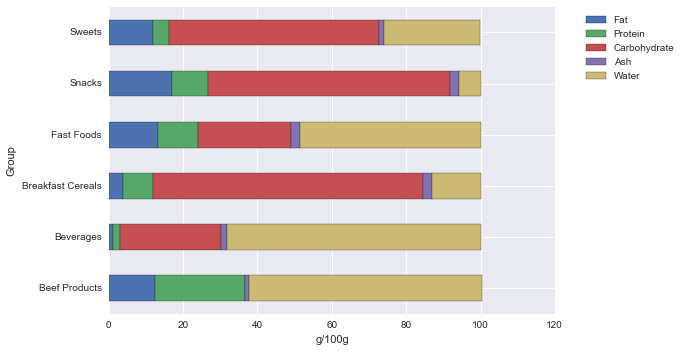

In [10]:
import matplotlib.pyplot as plt

s = df_proximities.groupby('Group')
stackbar = s.mean()[['Fat','Protein', 'Carbohydrate', 'Ash','Water']]
stackbar.plot(kind = 'barh', stacked = True)
plt.xlabel('g/100g')
plt.ylabel('Group')
plt.legend(bbox_to_anchor = (1.05,1), loc = 2)
plt.show()

(e) Create two histograms showing the distribution of Fat for Fat Foods, using 10 bins and 100 bins respectively. 
Plot two histograms as the subplots of a single figure.
Optionally, add a Gaussian kernel density plot to each histogram.


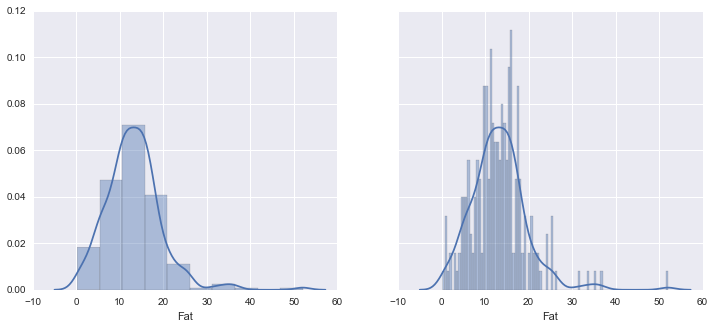

In [11]:
df_ff = df_proximities[df_proximities.Group == 'Fast Foods']

fig, axes = plt.subplots(ncols=2, figsize=(12,5), sharey=True)
sns.distplot(df_ff['Fat'].dropna(), kde=True, bins=10, ax=axes[0]);
sns.distplot(df_ff['Fat'].dropna(), kde=True, bins=100, ax=axes[1]);

(f) Create a scatter plot matrix (SPLOM) displaying the relations among Energy, Fat, Protein, and Carbohydrate.
Separate Sweets and Fast Foods in the comparison. Ignore other food groups.

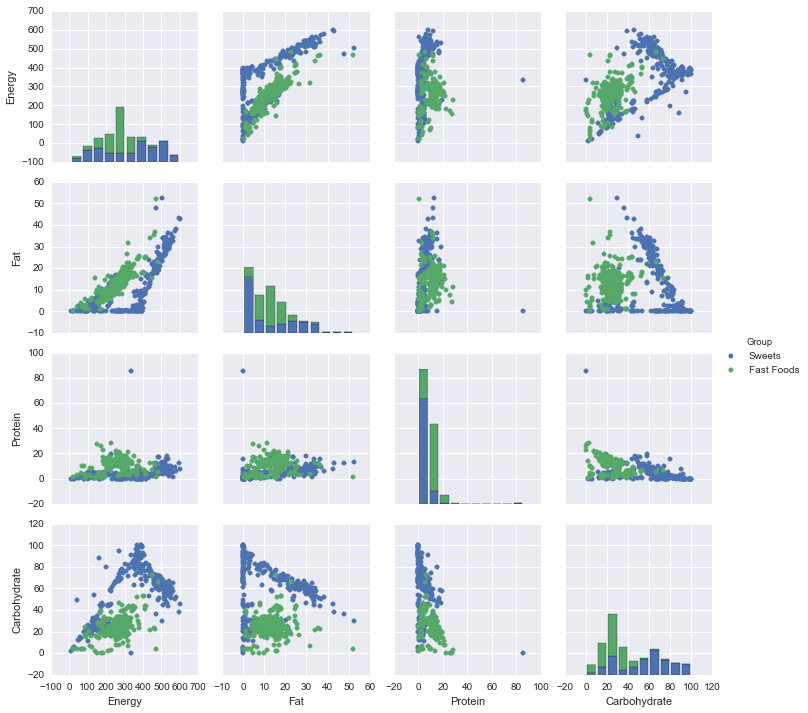

In [12]:
df_foods = df_proximities[df_proximities.Group.isin(('Fast Foods', 'Sweets'))]

df_cleaned = df_foods[['Energy','Fat','Protein',
                 'Carbohydrate', 'Group']]
sns.pairplot(df_cleaned, hue='Group');

(g) Create two scatter plots with a fitted curve displaying the relationship of Energy vs. Fat among Fast Foods. Use linear fit and 2nd-order polynomial fit respectively.
Plot two histograms as the subplots of a single figure.
Display confidence intervals for both plots.


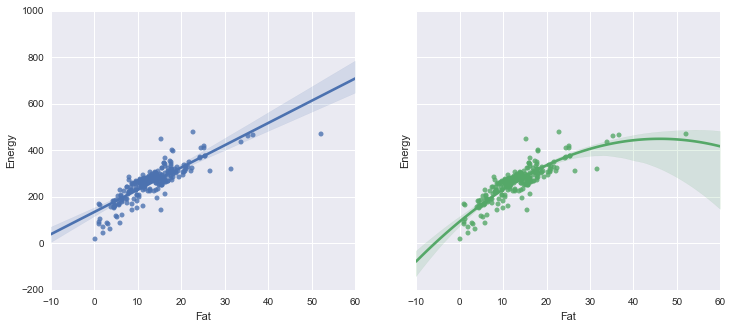

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5), sharey=True)
sns.regplot(x='Fat', y='Energy', data=df_ff, 
            ax=axes[0], scatter_kws={"s": 25})
sns.regplot(x='Fat', y='Energy', data=df_ff, order=2, 
            ax=axes[1], scatter_kws={"s": 25});

(h) Create a scatterplot with marginal histograms (SPLOM) for Energy vs. Fat among Fast Foods.

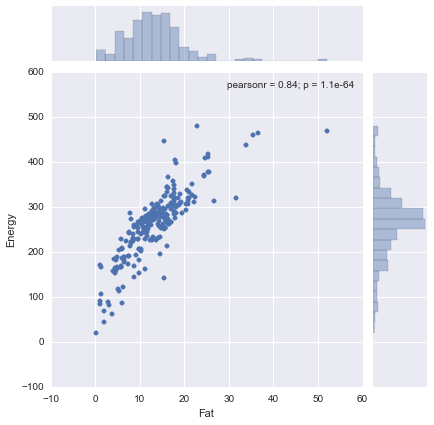

In [14]:
sns.jointplot(x='Fat', y='Energy', data=df_ff);

# Question 3

(a) Create a linear regression model of Energy and Fat for Fast Foods, which should be identical to the one created in the previous homework.


In [15]:
model1 = smf.ols('Energy ~ Fat', data=df_ff).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     559.8
Date:                Fri, 02 Oct 2015   Prob (F-statistic):           1.13e-64
Time:                        16:17:11   Log-Likelihood:                -1239.8
No. Observations:                 242   AIC:                             2484.
Df Residuals:                     240   BIC:                             2490.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    134.6526      5.934     22.692      0.000       122.963   146.342
Fat            9.5708      0.404     23.661      0.000         8.774    10.368
==============================================================================
Omnibus:                       31.267   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.528
Skew:                          -0.540   Prob(JB):                     1.62e-19
Kurtosis:                       5.723   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Which item in Fast Foods has the highest Fat? Do you think (make a guess) if it is an outlier in the regression model? 

In [16]:
df_highest = df_ff.groupby('Group').apply(lambda x: df_ff.ix[np.argmax(x.Fat),['Food','Fat']])
df_highest

1617,Food,Fat
Group,,
Fast Foods,"McDONALD'S, Creamy Ranch Sauce",52.03


Yes an outlier because it is outside of the 95% confidence interval.

(c) Use an appropriate diagnostic statistic (DFFITS, Cook's distance, studentized residuals, ...) of your choice to find the outliers in the regression model.

In [17]:
df_ff_clean = df_ff[['Food','Group','Fat', 'Energy']]

# Find outliers using Cook's Distance
influence = model1.get_influence()
cooks_distance = influence.cooks_distance[0]
number_of_observations = len(df_ff_clean)

# Use an empirical threshold value
cooks_threshold = 4 / number_of_observations

# Show outliers
df_ff_clean[cooks_distance > cooks_threshold]

,Food,Group,Fat,Energy
1529,"Fast foods, potato, mashed",Fast Foods,2.82,89
1617,"McDONALD'S, Creamy Ranch Sauce",Fast Foods,52.03,468
1620,"McDONALD'S, Spicy Buffalo Sauce",Fast Foods,15.45,142
1631,"McDONALD'S, McDONALDLAND Chocolate Chip Cookies",Fast Foods,22.79,480
1632,"McDONALD'S, McDONALDLAND Cookies",Fast Foods,15.35,447
1653,"McDONALD'S, NEWMAN'S OWN Creamy Caesar Dressing",Fast Foods,31.50,319
1654,"McDONALD'S, NEWMAN'S OWN Low Fat Balsamic Vina...",Fast Foods,5.94,86
1655,"McDONALD'S, NEWMAN'S OWN Ranch Dressing",Fast Foods,26.57,313
1674,"McDONALD'S, Caesar Salad with Grilled Chicken",Fast Foods,1.90,68
1676,"McDONALD'S, Caesar Salad without chicken",Fast Foods,2.05,44


(d) Remove the outliers you find in (c) from the data, and create a new linear regression model. Report the new coefficients, R-squared score, and the confidence intervals of the coefficients.

In [18]:
outlier_criterion = (cooks_distance > cooks_threshold)
outlier_indexes = np.nonzero(outlier_criterion)[0]

df_ff_cleaned = df_ff_clean[~outlier_criterion]
print("%d points before removal; %d after removal."%(
        len(df_ff_clean), len(df_ff_cleaned)))

242 points before removal; 226 after removal.


In [19]:
model2 = smf.ols('Energy ~ Fat', data=df_ff_cleaned).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     694.0
Date:                Fri, 02 Oct 2015   Prob (F-statistic):           1.50e-70
Time:                        16:17:11   Log-Likelihood:                -1088.2
No. Observations:                 226   AIC:                             2180.
Df Residuals:                     224   BIC:                             2187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    139.9323      5.147     27.188      0.000       129.790   150.075
Fat            9.4747      0.360     26.344      0.000         8.766    10.183
==============================================================================
Omnibus:                        5.856   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.521
Skew:                          -0.347   Prob(JB):                       0.0633
Kurtosis:                       3.324   Cond. No.                         37.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(e) Create a new scatterplot, showing all the data points, and both the old and the new regression lines.

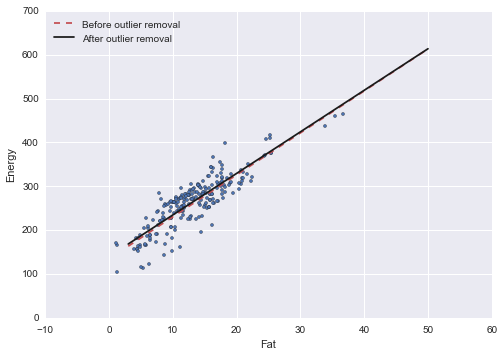

In [20]:
# Plot the old and new regression lines together
xs = np.linspace(3, 50, 2)
ys1 = model1.predict({'Fat': xs})
ys2 = model2.predict({'Fat': xs})
plt.scatter(df_ff_cleaned.Fat, df_ff_cleaned.Energy, 
            s=10, marker='o')
plt.scatter(df_ff_clean.ix[outlier_indexes, 'Fat'], 
            df_ff_clean.ix[outlier_indexes, 'Energy'], 
            s=10, color='r', marker='o')
plt.plot(xs, ys1, 'r--', label='Before outlier removal')
plt.plot(xs, ys2, 'k', label='After outlier removal')
plt.legend(loc='upper left')
plt.xlabel('Fat')
plt.ylabel('Energy')
plt.grid(True)

(f) Repeat steps (c) - (e) using a different statistic. Compare the results generated by both statistics.

In [21]:
df_ff_clean2 = df_ff[['Food','Group','Fat', 'Energy']]

# Find outliers using DFFITS
number_of_observations = len(df_ff_clean2)
number_of_parameters = 2  # parameters include: intercept, x
dffits = influence.dffits[0]

# Use an empirical threshold
dffits_threshold = 2 * np.sqrt(number_of_parameters / number_of_observations)
df_ff_clean2[np.abs(dffits) > dffits_threshold]

,Food,Group,Fat,Energy
1529,"Fast foods, potato, mashed",Fast Foods,2.82,89
1617,"McDONALD'S, Creamy Ranch Sauce",Fast Foods,52.03,468
1620,"McDONALD'S, Spicy Buffalo Sauce",Fast Foods,15.45,142
1631,"McDONALD'S, McDONALDLAND Chocolate Chip Cookies",Fast Foods,22.79,480
1632,"McDONALD'S, McDONALDLAND Cookies",Fast Foods,15.35,447
1653,"McDONALD'S, NEWMAN'S OWN Creamy Caesar Dressing",Fast Foods,31.50,319
1654,"McDONALD'S, NEWMAN'S OWN Low Fat Balsamic Vina...",Fast Foods,5.94,86
1655,"McDONALD'S, NEWMAN'S OWN Ranch Dressing",Fast Foods,26.57,313
1674,"McDONALD'S, Caesar Salad with Grilled Chicken",Fast Foods,1.90,68
1675,"McDONALD'S, Caesar Salad with Crispy Chicken",Fast Foods,5.31,113


In [22]:
# Remove outliers
# using DFFITS
outlier_criterion = ((np.abs(dffits)) > dffits_threshold)
outlier_indexes = np.nonzero(outlier_criterion)[0]

df_ff_cleaned2 = df_ff_clean2[~outlier_criterion]
print("%d points before removal; %d after removal."%(
        len(df_ff_clean2), len(df_ff_cleaned2)))

242 points before removal; 225 after removal.


In [23]:
model2 = smf.ols('Energy ~ Fat', data=df_ff_cleaned).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     694.0
Date:                Fri, 02 Oct 2015   Prob (F-statistic):           1.50e-70
Time:                        16:17:12   Log-Likelihood:                -1088.2
No. Observations:                 226   AIC:                             2180.
Df Residuals:                     224   BIC:                             2187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    139.9323      5.147     27.188      0.000       129.790   150.075
Fat            9.4747      0.360     26.344      0.000         8.766    10.183
==============================================================================
Omnibus:                        5.856   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.521
Skew:                          -0.347   Prob(JB):                       0.0633
Kurtosis:                       3.324   Cond. No.                         37.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

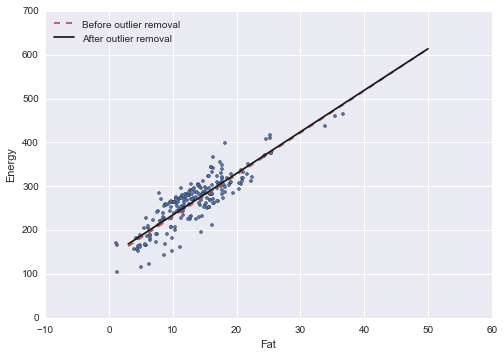

In [24]:
xs = np.linspace(3, 50, 2)
ys1 = model1.predict({'Fat': xs})
ys2 = model2.predict({'Fat': xs})
plt.scatter(df_ff_cleaned2.Fat, df_ff_cleaned2.Energy, 
            s=10, marker='o')
plt.scatter(df_ff_clean2.ix[outlier_indexes, 'Fat'], 
            df_ff_clean2.ix[outlier_indexes, 'Energy'], 
            s=10, color='r', marker='o')
plt.plot(xs, ys1, 'r--', label='Before outlier removal')
plt.plot(xs, ys2, 'k', label='After outlier removal')
plt.legend(loc='upper left')
plt.xlabel('Fat')
plt.ylabel('Energy')
plt.grid(True)

DFFITS found and removed one more outlier than Cook's Distance. Caesar Salad with Cripsy Chicken was only counted as an outlier when DFFITS was run. 

# Question 4

(a) What is the limitation of the plotting functionality provided by pandas? Can you provide a specific example to support your argument? What alternative(s) do you use instead and why?

Pandas has limited colors and does not do a great job of visualizing the data. Pandas is good for simple plotting and not as conducive for more complex plots. Seaborn has more themes that make it easier to visualize the data and make the aesthetic of the plots more appealing. "If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too" (http://stanford.edu/~mwaskom/software/seaborn/introduction.html).

(b) Among all the plots you make in Problem 2, which ones are showing quantitative variables? Which ones are showing nominal (categorical) variables? Which ones are involved with both?

All of the plots show quantitative variables but any of the plots that reference food groups are also showing categorical variables, like the plots in 2b through 2d.

(c) Based on (b), explain how seaborn makes certain types of plots significantly easier to produce compared to using pandas and matplotlib.

Seaborn makes some plots easier to produce because you can compare distributions between subsets of data. The hue function makes this very simple to do. 


